# Merged Savant and FanGraphs 2018 Analysis -xwOBA

In this notebook, I'm simply attempting to uncover players that deserve further analysis for the 2018 season and also look back at 2015 and 2016 stats to see if my "breakout" players actually did break out in 2016 and/or 2017

Since AB ranges from 75 to 662 in the merged_2017 dataset, simply looking at BA, H, HR, RBI, etc is not sufficient. Because of this, I will create more metrics to analyze per AB in an attempt to normalize players. I understand that players with 502 AB (minimum to qualify for batting title) is a "truer" view of their production than those with say under 100 AB, however I wanted to include as many players as I could and will take that into account in further stages of my analysis.

In [45]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
%matplotlib inline
pd.set_option("display.max_rows",500)

In [46]:
# read in 2015 merged savant and fangrapgs data
merged_2015 = pd.read_csv("C:/Users/avitosky/Documents/Baseball Project/merged_2015.csv")
merged_2016 = pd.read_csv("C:/Users/avitosky/Documents/Baseball Project/merged_2016.csv")
merged_2017 = pd.read_csv("C:/Users/avitosky/Documents/Baseball Project/merged_2017.csv")

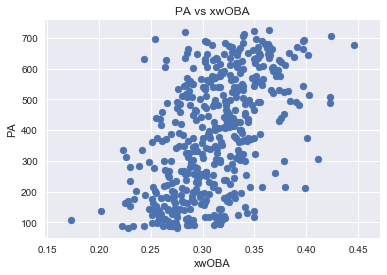

In [47]:
# plot scatter plot of PA vs xwOBA, generally more PA means higher xwOBA (better players play more) but not dramatically
plt.scatter(merged_2017['xwOBA'], merged_2017['PA'])
plt.title('PA vs xwOBA')
plt.xlabel('xwOBA')
plt.ylabel('PA')

plt.show()

In [48]:
# creating new per AB percentage metrics for later testing
merged_2015 ['HR/PA'] = merged_2015['HR'] /  merged_2015['PA']
merged_2016 ['HR/PA'] = merged_2016['HR'] /  merged_2016['PA']
merged_2017 ['HR/PA'] = merged_2017['HR'] /  merged_2017['PA']
merged_2015 ['R/PA'] = merged_2015['R'] /  merged_2015['PA']
merged_2016 ['R/PA'] = merged_2016['R'] /  merged_2016['PA']
merged_2017 ['R/PA'] = merged_2017['R'] /  merged_2017['PA']
merged_2015 ['RBI/PA'] = merged_2015['RBI'] /  merged_2015['PA']
merged_2016 ['RBI/PA'] = merged_2016['RBI'] /  merged_2016['PA']
merged_2017 ['RBI/PA'] = merged_2017['RBI'] /  merged_2017['PA']
merged_2015 ['SB/PA'] = merged_2015['SB'] /  merged_2015['PA']
merged_2016 ['SB/PA'] = merged_2016['SB'] /  merged_2016['PA']
merged_2017 ['SB/PA'] = merged_2017['SB'] /  merged_2017['PA']
merged_2015 ['Whiffs/PA'] = merged_2015['Whiffs'] /  merged_2015['PA']
merged_2016 ['Whiffs/PA'] = merged_2016['Whiffs'] /  merged_2016['PA']
merged_2017 ['Whiffs/PA'] = merged_2017['Whiffs'] /  merged_2017['PA']
merged_2015 ['Swings/PA'] = merged_2015['Swings'] /  merged_2015['PA']
merged_2016 ['Swings/PA'] = merged_2016['Swings'] /  merged_2016['PA']
merged_2017 ['Swings/PA'] = merged_2017['Swings'] /  merged_2017['PA']
merged_2015 ['Takes/PA'] = merged_2015['Takes'] /  merged_2015['PA']
merged_2016 ['Takes/PA'] = merged_2016['Takes'] /  merged_2016['PA']
merged_2017 ['Takes/PA'] = merged_2017['Takes'] /  merged_2017['PA']

In [49]:
# taking out counting stats and creating datasets with just rate stats for deeper analysis, keep PA as a reference point
# most interested in how xwOBA and wOBA correlate so putting them towards the front to view correlations easier

rate_stats_2015 = merged_2015.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BA', 'xBA', 'BB/PA', 'K/PA', 'Launch_Speed', 
                                      'Launch_Angle', 'BABIP', 'ISO', 'SLG',  'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA', 
                                      'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2016 = merged_2016.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BA', 'xBA', 'BB/PA', 'K/PA', 'Launch_Speed', 
                                      'Launch_Angle', 'BABIP', 'ISO', 'SLG',  'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA', 
                                      'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2017 = merged_2017.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BA', 'xBA', 'BB/PA', 'K/PA', 'Launch_Speed', 
                                      'Launch_Angle', 'BABIP', 'ISO', 'SLG',  'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA', 
                                      'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)

In [50]:
# let's look at our new dataset for 2017
rate_stats_2017

,Player_Name,PA,xwOBA,wOBA,BA,xBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,ISO,SLG,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
0,A.J. Ellis,163,0.273,0.294,0.210,0.197,0.074,0.178,80.8,16.5,0.222,0.161,0.371,0.036810,0.104294,0.085890,0.000000,0.319018,1.656442,2.239264
1,A.J. Pollock,466,0.331,0.340,0.266,0.265,0.075,0.152,82.9,10.7,0.291,0.205,0.471,0.030043,0.156652,0.105150,0.042918,0.298283,1.581545,2.135193
2,Aaron Altherr,412,0.330,0.359,0.272,0.244,0.078,0.252,83.3,14.3,0.328,0.245,0.516,0.046117,0.140777,0.157767,0.012136,0.514563,1.718447,2.131068
3,Aaron Hicks,361,0.335,0.363,0.266,0.233,0.141,0.186,83.0,16.5,0.290,0.209,0.475,0.041551,0.149584,0.144044,0.027701,0.426593,1.603878,2.481994
4,Aaron Judge,678,0.446,0.430,0.284,0.278,0.187,0.307,85.1,17.5,0.357,0.343,0.627,0.076696,0.188791,0.168142,0.013274,0.632743,1.811209,2.589971
5,Abraham Almonte,195,0.301,0.298,0.233,0.231,0.103,0.236,83.1,8.3,0.298,0.134,0.366,0.015385,0.133333,0.071795,0.010256,0.497436,1.861538,2.066667
6,Adam Duvall,647,0.295,0.327,0.249,0.217,0.060,0.263,81.5,22.8,0.290,0.232,0.480,0.047913,0.120556,0.153014,0.007728,0.482226,1.848532,1.975270
7,Adam Eaton,107,0.319,0.369,0.297,0.228,0.131,0.168,81.9,14.3,0.347,0.165,0.462,0.018692,0.224299,0.121495,0.028037,0.364486,1.757009,2.355140
8,Adam Engel,336,0.223,0.230,0.166,0.164,0.057,0.348,76.4,17.8,0.247,0.116,0.282,0.017857,0.101190,0.062500,0.023810,0.648810,1.869048,2.000000
9,Adam Frazier,454,0.325,0.322,0.276,0.275,0.079,0.126,80.6,14.6,0.306,0.123,0.399,0.013216,0.121145,0.116740,0.019824,0.237885,1.768722,2.070485


In [51]:
# a look at correlation between all rate stats, sorted by xwOBA
# xBA, SLG, ISO, BA are all correlated highly with xWOBA because they are all interconnected,need to drop them and reanalyze
rate_stats_2017.corr().sort_values(by='xwOBA', ascending=False)

,PA,xwOBA,wOBA,BA,xBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,ISO,SLG,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
xwOBA,0.518200,1.000000,0.823467,0.533680,0.766802,0.554829,-0.195193,0.645139,0.224597,0.236109,0.677389,0.758200,0.607224,0.467414,0.591037,-0.187462,-0.096309,-0.098816,0.256429
wOBA,0.537792,0.823467,1.000000,0.789975,0.630058,0.445814,-0.147622,0.460735,0.185048,0.547763,0.748893,0.927742,0.645413,0.678424,0.634759,0.009776,-0.044350,-0.039190,0.182542
xBA,0.503943,0.766802,0.630058,0.745330,1.000000,0.089368,-0.599747,0.432762,-0.091323,0.354041,0.297335,0.562181,0.210450,0.315083,0.396814,-0.084176,-0.417623,-0.116456,-0.078738
SLG,0.522764,0.758200,0.927742,0.685917,0.562181,0.231445,-0.040718,0.506109,0.295744,0.410699,0.904453,1.000000,0.819635,0.629829,0.772791,-0.045754,0.118790,0.144225,0.014837
ISO,0.399265,0.677389,0.748893,0.310031,0.297335,0.288615,0.206795,0.530718,0.471265,0.088253,1.000000,0.904453,0.952514,0.518901,0.779297,-0.143605,0.317958,0.213543,0.091102
Launch_Speed,0.358465,0.645139,0.460735,0.221798,0.432762,0.276684,-0.008786,1.000000,0.239353,0.034540,0.530718,0.506109,0.497111,0.222907,0.502370,-0.315203,0.047826,-0.104862,0.204214
HR/PA,0.345566,0.607224,0.645413,0.202257,0.210450,0.238867,0.276418,0.497111,0.480974,-0.012610,0.952514,0.819635,1.000000,0.416015,0.771772,-0.187473,0.388562,0.269415,0.052674
RBI/PA,0.328848,0.591037,0.634759,0.393410,0.396814,0.116789,0.041924,0.502370,0.338213,0.133475,0.779297,0.772791,0.771772,0.341698,1.000000,-0.244776,0.199138,0.204345,-0.033105
BB/PA,0.171868,0.554829,0.445814,0.022529,0.089368,1.000000,0.085075,0.276684,0.182623,0.020766,0.288615,0.231445,0.238867,0.309690,0.116789,-0.084228,-0.084457,-0.377850,0.722242
BA,0.484329,0.533680,0.789975,1.000000,0.745330,0.022529,-0.443286,0.221798,-0.145143,0.764805,0.310031,0.685917,0.202257,0.519006,0.393410,0.143781,-0.276934,-0.041758,-0.123718


In [52]:
# look again at xWOBA correlations after dropping xBA, BA, ISO, SLG
# Launch_Speed, HR/PA%, RBI/PA%, BB% are top correlated variables with xWOBA
rate_stats_2017 = rate_stats_2017.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BB/PA', 'K/PA', 'Launch_Speed', 'Launch_Angle', 
                                   'BABIP', 'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA',
                                   'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2017.corr().sort_values('xwOBA', ascending=False)

,PA,xwOBA,wOBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
xwOBA,0.518200,1.000000,0.823467,0.554829,-0.195193,0.645139,0.224597,0.236109,0.607224,0.467414,0.591037,-0.187462,-0.096309,-0.098816,0.256429
wOBA,0.537792,0.823467,1.000000,0.445814,-0.147622,0.460735,0.185048,0.547763,0.645413,0.678424,0.634759,0.009776,-0.044350,-0.039190,0.182542
Launch_Speed,0.358465,0.645139,0.460735,0.276684,-0.008786,1.000000,0.239353,0.034540,0.497111,0.222907,0.502370,-0.315203,0.047826,-0.104862,0.204214
HR/PA,0.345566,0.607224,0.645413,0.238867,0.276418,0.497111,0.480974,-0.012610,1.000000,0.416015,0.771772,-0.187473,0.388562,0.269415,0.052674
RBI/PA,0.328848,0.591037,0.634759,0.116789,0.041924,0.502370,0.338213,0.133475,0.771772,0.341698,1.000000,-0.244776,0.199138,0.204345,-0.033105
BB/PA,0.171868,0.554829,0.445814,1.000000,0.085075,0.276684,0.182623,0.020766,0.238867,0.309690,0.116789,-0.084228,-0.084457,-0.377850,0.722242
PA,1.000000,0.518200,0.537792,0.171868,-0.287228,0.358465,0.171625,0.198151,0.345566,0.350403,0.328848,0.098223,-0.173567,-0.068087,0.002861
R/PA,0.350403,0.467414,0.678424,0.309690,-0.026759,0.222907,0.055946,0.416697,0.416015,1.000000,0.341698,0.354800,0.022512,-0.037720,0.168647
Takes/PA,0.002861,0.256429,0.182542,0.722242,0.138355,0.204214,0.104104,-0.040906,0.052674,0.168647,-0.033105,-0.051079,-0.214850,-0.550462,1.000000
BABIP,0.198151,0.236109,0.547763,0.020766,0.087317,0.034540,-0.257103,1.000000,-0.012610,0.416697,0.133475,0.205952,0.126436,0.087729,-0.040906


In [53]:
# with actual wOBA, R/PA% jumps to the top followed by HR/PA%, RBI/PA%, BABIP, and Launch_Speed
rate_stats_2017 = rate_stats_2017.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BB/PA', 'K/PA', 'Launch_Speed', 'Launch_Angle', 
                                   'BABIP', 'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA',
                                   'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2017.corr().sort_values('wOBA', ascending=False)

,PA,xwOBA,wOBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
wOBA,0.537792,0.823467,1.000000,0.445814,-0.147622,0.460735,0.185048,0.547763,0.645413,0.678424,0.634759,0.009776,-0.044350,-0.039190,0.182542
xwOBA,0.518200,1.000000,0.823467,0.554829,-0.195193,0.645139,0.224597,0.236109,0.607224,0.467414,0.591037,-0.187462,-0.096309,-0.098816,0.256429
R/PA,0.350403,0.467414,0.678424,0.309690,-0.026759,0.222907,0.055946,0.416697,0.416015,1.000000,0.341698,0.354800,0.022512,-0.037720,0.168647
HR/PA,0.345566,0.607224,0.645413,0.238867,0.276418,0.497111,0.480974,-0.012610,1.000000,0.416015,0.771772,-0.187473,0.388562,0.269415,0.052674
RBI/PA,0.328848,0.591037,0.634759,0.116789,0.041924,0.502370,0.338213,0.133475,0.771772,0.341698,1.000000,-0.244776,0.199138,0.204345,-0.033105
BABIP,0.198151,0.236109,0.547763,0.020766,0.087317,0.034540,-0.257103,1.000000,-0.012610,0.416697,0.133475,0.205952,0.126436,0.087729,-0.040906
PA,1.000000,0.518200,0.537792,0.171868,-0.287228,0.358465,0.171625,0.198151,0.345566,0.350403,0.328848,0.098223,-0.173567,-0.068087,0.002861
Launch_Speed,0.358465,0.645139,0.460735,0.276684,-0.008786,1.000000,0.239353,0.034540,0.497111,0.222907,0.502370,-0.315203,0.047826,-0.104862,0.204214
BB/PA,0.171868,0.554829,0.445814,1.000000,0.085075,0.276684,0.182623,0.020766,0.238867,0.309690,0.116789,-0.084228,-0.084457,-0.377850,0.722242
Launch_Angle,0.171625,0.224597,0.185048,0.182623,0.216729,0.239353,1.000000,-0.257103,0.480974,0.055946,0.338213,-0.263990,0.224484,0.280280,0.104104


In [54]:
# 2016 xWOBA correlations have similar values to 2017 xWOBA correlations again with Launch_Speed at the top
rate_stats_2016 = rate_stats_2016.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BB/PA', 'K/PA', 'Launch_Speed', 'Launch_Angle', 
                                   'BABIP', 'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA',
                                   'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2016.corr().sort_values('xwOBA', ascending=False)

,PA,xwOBA,wOBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
xwOBA,0.522343,1.000000,0.799264,0.493599,-0.156240,0.698957,0.177131,0.264013,0.598881,0.408658,0.596144,-0.186578,-0.052088,-0.111752,0.289609
wOBA,0.565675,0.799264,1.000000,0.394794,-0.120760,0.498414,0.163817,0.613564,0.597112,0.666003,0.621101,0.042403,-0.009047,-0.032023,0.211742
Launch_Speed,0.387655,0.698957,0.498414,0.233332,0.054296,1.000000,0.171958,0.076478,0.601924,0.183760,0.538245,-0.295310,0.147421,-0.029886,0.169715
HR/PA,0.356836,0.598881,0.597112,0.254784,0.345182,0.601924,0.466338,-0.033030,1.000000,0.381373,0.747733,-0.221501,0.439815,0.236106,0.146599
RBI/PA,0.405472,0.596144,0.621101,0.124183,0.065959,0.538245,0.351010,0.129866,0.747733,0.327705,1.000000,-0.226616,0.233628,0.218242,-0.017145
PA,1.000000,0.522343,0.565675,0.122484,-0.276738,0.387655,0.081651,0.251597,0.356836,0.450066,0.405472,0.106208,-0.155702,-0.040901,0.008948
BB/PA,0.122484,0.493599,0.394794,1.000000,0.175501,0.233332,0.090738,0.028993,0.254784,0.219625,0.124183,-0.059094,0.030328,-0.356161,0.750362
R/PA,0.450066,0.408658,0.666003,0.219625,-0.072825,0.183760,0.029325,0.437672,0.381373,1.000000,0.327705,0.282909,-0.026656,-0.052809,0.125601
Takes/PA,0.008948,0.289609,0.211742,0.750362,0.216140,0.169715,0.083392,-0.012045,0.146599,0.125601,-0.017145,-0.044352,-0.102625,-0.501300,1.000000
BABIP,0.251597,0.264013,0.613564,0.028993,0.024789,0.076478,-0.174430,1.000000,-0.033030,0.437672,0.129866,0.294954,0.058043,0.093594,-0.012045


In [55]:
# 2016 wOBA also has similar correlation values to 2017 wOBA
rate_stats_2016 = rate_stats_2016.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BB/PA', 'K/PA', 'Launch_Speed', 'Launch_Angle', 
                                   'BABIP', 'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA',
                                   'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2016.corr().sort_values('wOBA', ascending=False)

,PA,xwOBA,wOBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
wOBA,0.565675,0.799264,1.000000,0.394794,-0.120760,0.498414,0.163817,0.613564,0.597112,0.666003,0.621101,0.042403,-0.009047,-0.032023,0.211742
xwOBA,0.522343,1.000000,0.799264,0.493599,-0.156240,0.698957,0.177131,0.264013,0.598881,0.408658,0.596144,-0.186578,-0.052088,-0.111752,0.289609
R/PA,0.450066,0.408658,0.666003,0.219625,-0.072825,0.183760,0.029325,0.437672,0.381373,1.000000,0.327705,0.282909,-0.026656,-0.052809,0.125601
RBI/PA,0.405472,0.596144,0.621101,0.124183,0.065959,0.538245,0.351010,0.129866,0.747733,0.327705,1.000000,-0.226616,0.233628,0.218242,-0.017145
BABIP,0.251597,0.264013,0.613564,0.028993,0.024789,0.076478,-0.174430,1.000000,-0.033030,0.437672,0.129866,0.294954,0.058043,0.093594,-0.012045
HR/PA,0.356836,0.598881,0.597112,0.254784,0.345182,0.601924,0.466338,-0.033030,1.000000,0.381373,0.747733,-0.221501,0.439815,0.236106,0.146599
PA,1.000000,0.522343,0.565675,0.122484,-0.276738,0.387655,0.081651,0.251597,0.356836,0.450066,0.405472,0.106208,-0.155702,-0.040901,0.008948
Launch_Speed,0.387655,0.698957,0.498414,0.233332,0.054296,1.000000,0.171958,0.076478,0.601924,0.183760,0.538245,-0.295310,0.147421,-0.029886,0.169715
BB/PA,0.122484,0.493599,0.394794,1.000000,0.175501,0.233332,0.090738,0.028993,0.254784,0.219625,0.124183,-0.059094,0.030328,-0.356161,0.750362
Takes/PA,0.008948,0.289609,0.211742,0.750362,0.216140,0.169715,0.083392,-0.012045,0.146599,0.125601,-0.017145,-0.044352,-0.102625,-0.501300,1.000000


In [56]:
# same with 2015 xWOBA, just for good measure...
rate_stats_2015 = rate_stats_2015.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BB/PA', 'K/PA', 'Launch_Speed', 'Launch_Angle', 
                                   'BABIP', 'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA',
                                   'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2015.corr().sort_values('xwOBA', ascending=False)

,PA,xwOBA,wOBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
xwOBA,0.457350,1.000000,0.839536,0.576344,-0.163452,0.733438,0.273972,0.363072,0.630086,0.448491,0.649832,-0.162701,-0.009867,-0.043205,0.287290
wOBA,0.470927,0.839536,1.000000,0.445687,-0.182994,0.604984,0.165851,0.621261,0.640588,0.632337,0.667723,0.019146,-0.032415,-0.001100,0.223007
Launch_Speed,0.287837,0.733438,0.604984,0.392284,0.179781,1.000000,0.328752,0.224378,0.681807,0.267789,0.653080,-0.319412,0.291767,0.130291,0.227040
RBI/PA,0.334756,0.649832,0.667723,0.207794,0.011145,0.653080,0.286905,0.172980,0.783028,0.379766,1.000000,-0.245832,0.185497,0.183407,0.050427
HR/PA,0.220870,0.630086,0.640588,0.307524,0.286526,0.681807,0.440168,0.037083,1.000000,0.432308,0.783028,-0.255771,0.396043,0.217788,0.166091
BB/PA,0.133585,0.576344,0.445687,1.000000,0.093212,0.392284,0.240440,0.034552,0.307524,0.256915,0.207794,-0.068895,0.023369,-0.347475,0.686347
PA,1.000000,0.457350,0.470927,0.133585,-0.371089,0.287837,0.105884,0.268870,0.220870,0.328449,0.334756,0.139446,-0.245476,-0.046858,-0.002452
R/PA,0.328449,0.448491,0.632337,0.256915,-0.094618,0.267789,0.058941,0.352715,0.432308,1.000000,0.379766,0.301823,-0.051282,-0.050041,0.167123
BABIP,0.268870,0.363072,0.621261,0.034552,-0.010886,0.224378,-0.177044,1.000000,0.037083,0.352715,0.172980,0.207182,0.077630,0.147687,-0.030092
Takes/PA,-0.002452,0.287290,0.223007,0.686347,0.138273,0.227040,0.133675,-0.030092,0.166091,0.167123,0.050427,-0.053284,-0.132205,-0.538840,1.000000


In [57]:
# lastly 2015 wOBA but RBI/PA% at the top instead of R/PA%, however the top 5 are all bunched pretty closely around ~ 0.6 - 0.65
rate_stats_2015 = rate_stats_2015.filter(['Player_Name', 'PA', 'xwOBA', 'wOBA', 'BB/PA', 'K/PA', 'Launch_Speed', 'Launch_Angle', 
                                   'BABIP', 'HR/PA', 'R/PA', 'RBI/PA', 'SB/PA',
                                   'Whiffs/PA', 'Swings/PA', 'Takes/PA'], axis=1)
rate_stats_2015.corr().sort_values('wOBA', ascending=False)

,PA,xwOBA,wOBA,BB/PA,K/PA,Launch_Speed,Launch_Angle,BABIP,HR/PA,R/PA,RBI/PA,SB/PA,Whiffs/PA,Swings/PA,Takes/PA
wOBA,0.470927,0.839536,1.000000,0.445687,-0.182994,0.604984,0.165851,0.621261,0.640588,0.632337,0.667723,0.019146,-0.032415,-0.001100,0.223007
xwOBA,0.457350,1.000000,0.839536,0.576344,-0.163452,0.733438,0.273972,0.363072,0.630086,0.448491,0.649832,-0.162701,-0.009867,-0.043205,0.287290
RBI/PA,0.334756,0.649832,0.667723,0.207794,0.011145,0.653080,0.286905,0.172980,0.783028,0.379766,1.000000,-0.245832,0.185497,0.183407,0.050427
HR/PA,0.220870,0.630086,0.640588,0.307524,0.286526,0.681807,0.440168,0.037083,1.000000,0.432308,0.783028,-0.255771,0.396043,0.217788,0.166091
R/PA,0.328449,0.448491,0.632337,0.256915,-0.094618,0.267789,0.058941,0.352715,0.432308,1.000000,0.379766,0.301823,-0.051282,-0.050041,0.167123
BABIP,0.268870,0.363072,0.621261,0.034552,-0.010886,0.224378,-0.177044,1.000000,0.037083,0.352715,0.172980,0.207182,0.077630,0.147687,-0.030092
Launch_Speed,0.287837,0.733438,0.604984,0.392284,0.179781,1.000000,0.328752,0.224378,0.681807,0.267789,0.653080,-0.319412,0.291767,0.130291,0.227040
PA,1.000000,0.457350,0.470927,0.133585,-0.371089,0.287837,0.105884,0.268870,0.220870,0.328449,0.334756,0.139446,-0.245476,-0.046858,-0.002452
BB/PA,0.133585,0.576344,0.445687,1.000000,0.093212,0.392284,0.240440,0.034552,0.307524,0.256915,0.207794,-0.068895,0.023369,-0.347475,0.686347
Takes/PA,-0.002452,0.287290,0.223007,0.686347,0.138273,0.227040,0.133675,-0.030092,0.166091,0.167123,0.050427,-0.053284,-0.132205,-0.538840,1.000000


In [58]:
# now I think it's safe to drop Takes/PA, Launch_Angle, SB/PA, Swings/PA, Whiffs/PA, K/PA due to low or negative correlations
# Stolen bases (SB) are a going to be a beast on their own so I'll come back to them later

rate_stats_2015 = merged_2015.filter(['Player_Name', 'PA', 'BB/PA', 'Launch_Speed', 'BABIP', 
                                     'wOBA', 'xwOBA', 'HR/PA', 'R/PA', 'RBI/PA' ], axis=1)
rate_stats_2016 = merged_2016.filter(['Player_Name', 'PA', 'BB/PA', 'Launch_Speed', 'BABIP', 
                                     'wOBA', 'xwOBA', 'HR/PA', 'R/PA', 'RBI/PA'], axis=1)
rate_stats_2017 = merged_2017.filter(['Player_Name', 'PA', 'BB/PA', 'Launch_Speed', 'BABIP', 
                                     'wOBA', 'xwOBA', 'HR/PA', 'R/PA', 'RBI/PA'], axis=1)

In [59]:
# since Launch_Speed is the greatest predictor of xWOBA, let's first sort by that and see what we get
# some familiar names in Correa, Abreu, Stanton, some not so much in Diaz, Avila, Olson, let's keep digging...
rate_stats_2017.sort_values(by='Launch_Speed', ascending=False)

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA
443,Yandy Diaz,179,0.117,87.1,0.336,0.306,0.331,0.000000,0.139665,0.072626
23,Alex Avila,376,0.165,86.4,0.382,0.362,0.401,0.037234,0.109043,0.130319
386,Ryan Zimmerman,576,0.076,85.8,0.335,0.387,0.375,0.062500,0.156250,0.187500
80,Carlos Correa,481,0.110,85.8,0.352,0.394,0.393,0.049896,0.170478,0.174636
244,Jose Abreu,675,0.052,85.8,0.330,0.377,0.364,0.048889,0.140741,0.151111
173,Giancarlo Stanton,692,0.123,85.6,0.288,0.410,0.398,0.085260,0.177746,0.190751
316,Matt Olson,216,0.102,85.4,0.238,0.411,0.380,0.111111,0.152778,0.208333
269,Kendrys Morales,608,0.071,85.4,0.278,0.320,0.358,0.046053,0.110197,0.139803
330,Miguel Sano,483,0.112,85.4,0.375,0.361,0.348,0.057971,0.155280,0.159420
11,Adam Lind,301,0.093,85.4,0.316,0.363,0.379,0.046512,0.129568,0.196013


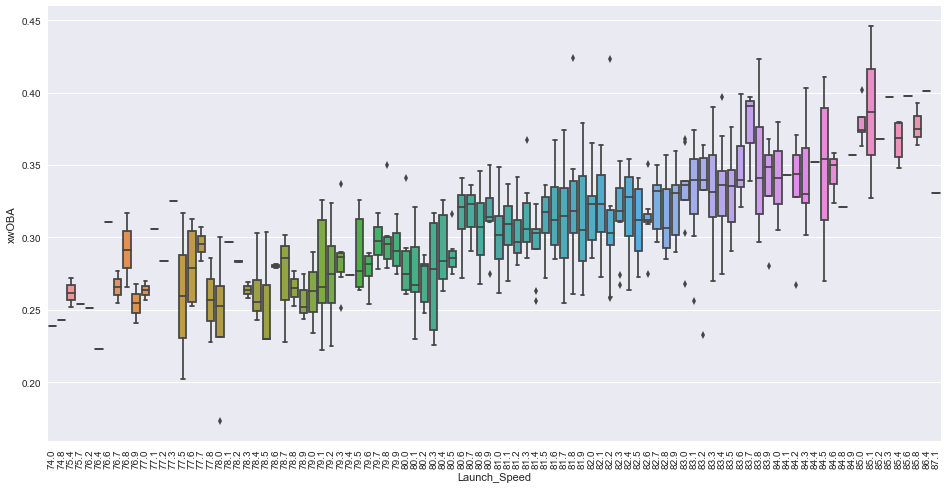

In [60]:
# obviously hitting the ball harder gives a greater chance for success but here it is visually
plt.figure(figsize = (16,8))
sns.boxplot(x='Launch_Speed', y = 'xwOBA', data = rate_stats_2017)
xt = plt.xticks(rotation=90)

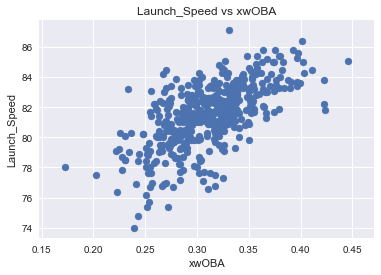

In [61]:
# ok maybe a scatter plot would make a little more sense
plt.scatter(rate_stats_2017['xwOBA'], rate_stats_2017['Launch_Speed'])
plt.title('Launch_Speed vs xwOBA')
plt.xlabel('xwOBA')
plt.ylabel('Launch_Speed')
plt.show()

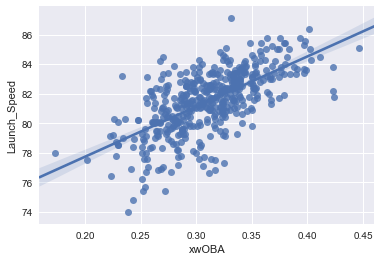

In [62]:
# ok how about with a regression line this time, looks pretty good to me. I peeked in the data and that outlier on the right is
# none other than Aaron Judge with an almost 0.450 xwOBA and 85 Launch_Speed, wow! Could we have predicted that? Maybe...
sns.regplot(x="xwOBA", y="Launch_Speed", data=rate_stats_2017)

In [63]:
# looking at the breakdown in Launch_Speed, we see that the top 25% are > 83.0, let's start there and see what we come up with
rate_stats_2017['Launch_Speed'].describe()

count    456.000000
mean      81.481140
std        2.117513
min       74.000000
25%       80.100000
50%       81.700000
75%       83.000000
max       87.100000
Name: Launch_Speed, dtype: float64

In [64]:
# let's look at all players with Launch_Speed > 83.0
# Yandy Diaz, who the heck? Steroids? Kidding, kidding. Jokes aside, this guy is JACKED, take a look at the link yourself below
# https://cdn-mf0.heartyhosting.com/sites/mensfitness.com/files/yandy-diaz-indians-jacked-1280.jpg
rate_stats_2017[rate_stats_2017.Launch_Speed > 83.0].sort_values(by='Launch_Speed', ascending=False)

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA
443,Yandy Diaz,179,0.117,87.1,0.336,0.306,0.331,0.000000,0.139665,0.072626
23,Alex Avila,376,0.165,86.4,0.382,0.362,0.401,0.037234,0.109043,0.130319
386,Ryan Zimmerman,576,0.076,85.8,0.335,0.387,0.375,0.062500,0.156250,0.187500
244,Jose Abreu,675,0.052,85.8,0.330,0.377,0.364,0.048889,0.140741,0.151111
80,Carlos Correa,481,0.110,85.8,0.352,0.394,0.393,0.049896,0.170478,0.174636
173,Giancarlo Stanton,692,0.123,85.6,0.288,0.410,0.398,0.085260,0.177746,0.190751
316,Matt Olson,216,0.102,85.4,0.238,0.411,0.380,0.111111,0.152778,0.208333
330,Miguel Sano,483,0.112,85.4,0.375,0.361,0.348,0.057971,0.155280,0.159420
269,Kendrys Morales,608,0.071,85.4,0.278,0.320,0.358,0.046053,0.110197,0.139803
11,Adam Lind,301,0.093,85.4,0.316,0.363,0.379,0.046512,0.129568,0.196013


In [65]:
# some familiar names in there and some not so familiar names, 109 players to be exact, will eventually need to narrow down list
print(len(rate_stats_2017[rate_stats_2017.Launch_Speed > 83]))

109


In [66]:
# next let's look at the merged data and sort by PA ascending to get a glance at some lesser known players who fit this criteria
# some interesting names, however a lot of part time players which doesn't help in fantasy
rate_stats_2017[rate_stats_2017.Launch_Speed > 83.0].sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA
405,Stuart Turner,89,0.056,83.2,0.153,0.186,0.233,0.022472,0.044944,0.078652
400,Stephen Drew,106,0.075,84.2,0.303,0.285,0.267,0.009434,0.084906,0.160377
436,Willy Garcia,119,0.092,83.4,0.311,0.301,0.275,0.016807,0.126050,0.100840
45,Austin Slater,127,0.063,84.5,0.353,0.323,0.270,0.023622,0.118110,0.125984
107,Colby Rasmus,129,0.054,83.5,0.368,0.365,0.343,0.069767,0.131783,0.178295
220,Jesse Winker,137,0.109,83.1,0.322,0.384,0.350,0.051095,0.153285,0.109489
219,Jeimer Candelario,142,0.092,83.8,0.351,0.342,0.316,0.021127,0.126761,0.112676
427,Tyler Collins,169,0.107,83.9,0.264,0.269,0.280,0.029586,0.106509,0.082840
176,Greg Bird,170,0.112,84.6,0.194,0.303,0.324,0.052941,0.117647,0.164706
443,Yandy Diaz,179,0.117,87.1,0.336,0.306,0.331,0.000000,0.139665,0.072626


In [67]:
# MLB managers overwhelmingly use BA and OBP for playing time decisions, whether that is correct or just old school
# media trying to influence playing time, it is a major factor so let's loop 'BA' and 'OBP' back in to help narrow down our list
rate_stats_2015 = merged_2015.filter(['Player_Name', 'PA', 'BB/PA', 'Launch_Speed', 'BABIP', 
                                     'wOBA', 'xwOBA', 'HR/PA', 'R/PA', 'RBI/PA', 'BA', 'OBP'], axis=1)
rate_stats_2016 = merged_2016.filter(['Player_Name', 'PA', 'BB/PA', 'Launch_Speed', 'BABIP', 
                                     'wOBA', 'xwOBA', 'HR/PA', 'R/PA', 'RBI/PA', 'BA', 'OBP'], axis=1)
rate_stats_2017 = merged_2017.filter(['Player_Name', 'PA', 'BB/PA', 'Launch_Speed', 'BABIP', 
                                     'wOBA', 'xwOBA', 'HR/PA', 'R/PA', 'RBI/PA', 'BA', 'OBP'], axis=1)

In [68]:
# looking at 2017 'BA' breakdown
rate_stats_2017['BA'].describe()

count    456.000000
mean       0.252110
std        0.036173
min        0.134000
25%        0.231000
50%        0.255000
75%        0.276250
max        0.346000
Name: BA, dtype: float64

In [69]:
# and 2017 'OBP'
rate_stats_2017['OBP'].describe()

count    456.000000
mean       0.321586
std        0.041196
min        0.176000
25%        0.294000
50%        0.323000
75%        0.350000
max        0.454000
Name: OBP, dtype: float64

In [70]:
# 0.200 'BA' and 0.300 'OBP' are usually major cutoffs for playing time in the MLB but to stay consistent with our top 25%
# cutoff, let's create a new dataset and look at Launch_Speed > 83.0, BA > 0.276, and OBP > 0.350
rate_stats_2017_v2 = rate_stats_2017[(rate_stats_2017.Launch_Speed > 83.0) & 
                                     (rate_stats_2017.BA > 0.276) & (rate_stats_2017.OBP > 0.350)]

In [71]:
# sorting by'PA', Lind is a part time player, but Winker, Candelario, Barnes, Martinez all potential 2018 breakouts?
# the rest were full time starters in 2017 and in pretty good company to be honest
rate_stats_2017_v2.sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
220,Jesse Winker,137,0.109,83.1,0.322,0.384,0.350,0.051095,0.153285,0.109489,0.298,0.375
219,Jeimer Candelario,142,0.092,83.8,0.351,0.342,0.316,0.021127,0.126761,0.112676,0.283,0.359
41,Austin Barnes,262,0.149,83.4,0.329,0.386,0.370,0.030534,0.133588,0.145038,0.289,0.408
11,Adam Lind,301,0.093,85.4,0.316,0.363,0.379,0.046512,0.129568,0.196013,0.303,0.362
249,Jose Martinez,307,0.104,84.5,0.350,0.379,0.411,0.045603,0.153094,0.149837,0.309,0.379
323,Michael Brantley,375,0.083,83.8,0.325,0.342,0.344,0.024000,0.125333,0.138667,0.299,0.357
263,Justin Bour,429,0.110,83.1,0.322,0.374,0.374,0.058275,0.121212,0.193473,0.289,0.366
324,Michael Conforto,440,0.130,83.8,0.328,0.392,0.376,0.061364,0.163636,0.154545,0.279,0.384
80,Carlos Correa,481,0.110,85.8,0.352,0.394,0.393,0.049896,0.170478,0.174636,0.315,0.391
193,J.D. Martinez,489,0.108,83.8,0.327,0.430,0.423,0.092025,0.173824,0.212679,0.303,0.376


In [72]:
# from 109 down to 33
print(len(rate_stats_2017_v2))

33


In [73]:
# Launch_Speed was also highest correlated with xWOBA in 2016 so let's see how it is broken down
rate_stats_2016['Launch_Speed'].describe()

count    459.000000
mean      83.332462
std        2.248195
min       76.400000
25%       81.800000
50%       83.600000
75%       84.900000
max       88.600000
Name: Launch_Speed, dtype: float64

In [74]:
# in 2016, the top 25% cutoff is 84.9 so we'll look at everything above that
rate_stats_2016[rate_stats_2016.Launch_Speed > 84.9].sort_values(by='Launch_Speed', ascending=False)

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
108,Christian Yelich,659,0.109,88.6,0.356,0.367,0.381,0.031866,0.118361,0.148710,0.298,0.376
311,Matt Holliday,426,0.082,88.3,0.253,0.335,0.354,0.046948,0.112676,0.145540,0.246,0.322
271,Kendrys Morales,618,0.078,88.0,0.283,0.339,0.399,0.048544,0.105178,0.150485,0.263,0.327
148,Domingo Santana,281,0.114,87.9,0.359,0.343,0.355,0.039146,0.120996,0.113879,0.256,0.345
124,Daniel Murphy,582,0.060,87.7,0.348,0.408,0.403,0.042955,0.151203,0.178694,0.347,0.390
340,Nelson Cruz,667,0.093,87.7,0.320,0.383,0.398,0.064468,0.143928,0.157421,0.287,0.360
326,Miguel Cabrera,679,0.110,87.7,0.336,0.399,0.459,0.055965,0.135493,0.159057,0.316,0.393
86,Carlos Santana,688,0.144,87.6,0.258,0.370,0.387,0.049419,0.129360,0.126453,0.259,0.366
134,David Ortiz,626,0.128,87.6,0.312,0.419,0.438,0.060703,0.126198,0.202875,0.315,0.401
294,Mac Williamson,127,0.102,87.6,0.268,0.317,0.322,0.047244,0.110236,0.118110,0.223,0.315


In [75]:
# starting at 108 in 2016 after 109 in 2017 so similar numbers which is good
print(len(rate_stats_2016[rate_stats_2016.Launch_Speed > 84.9]))

108


In [76]:
# cut down to 108, similar numbers to 2017, now let's sort by 'PA' and see who 'should' have broken out in 2017
# AARON JUDGE THERE HE IS!
# Judge, Moustakas, Pham, Sanchez, Santana fit initial criteria and had great seasons, albeit others that didn't pan out
rate_stats_2016[rate_stats_2016.Launch_Speed > 84.9].sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
175,Geovany Soto,86,0.070,85.1,0.321,0.345,0.352,0.046512,0.127907,0.104651,0.269,0.321
130,Darin Ruf,89,0.045,86.8,0.246,0.245,0.309,0.033708,0.089888,0.101124,0.205,0.236
6,Aaron Judge,95,0.095,85.5,0.282,0.267,0.284,0.042105,0.105263,0.105263,0.179,0.263
233,Joey Wendle,104,0.058,86.9,0.296,0.265,0.297,0.009615,0.105769,0.105769,0.260,0.298
411,Teoscar Hernandez,112,0.098,85.2,0.275,0.308,0.274,0.035714,0.133929,0.098214,0.230,0.304
40,Anthony Recker,112,0.143,85.9,0.343,0.361,0.417,0.017857,0.053571,0.133929,0.278,0.394
331,Mike Moustakas,113,0.080,87.0,0.214,0.339,0.375,0.061947,0.106195,0.115044,0.240,0.301
248,Jose Lobaton,114,0.105,85.4,0.253,0.301,0.351,0.026316,0.087719,0.070175,0.232,0.319
336,Mitch Haniger,123,0.098,86.4,0.256,0.303,0.320,0.040650,0.073171,0.138211,0.229,0.309
294,Mac Williamson,127,0.102,87.6,0.268,0.317,0.322,0.047244,0.110236,0.118110,0.223,0.315


In [77]:
# now let's look at 2016 BA and OBP just like we did for 2017
rate_stats_2016['BA'].describe()

count    459.000000
mean       0.250952
std        0.036245
min        0.094000
25%        0.228000
50%        0.253000
75%        0.275000
max        0.348000
Name: BA, dtype: float64

In [78]:
# and 2016 OBP
rate_stats_2016['OBP'].describe()

count    459.000000
mean       0.317536
std        0.040320
min        0.105000
25%        0.295000
50%        0.318000
75%        0.346000
max        0.441000
Name: OBP, dtype: float64

In [79]:
# cutoffs for our exercise for 2016 are 84.9 for 'Launch_Speed', 0.275 for 'BA', and 0.346 for 'OBP'
rate_stats_2016_v2 = rate_stats_2016[(rate_stats_2016.Launch_Speed > 84.9) & 
                                     (rate_stats_2016.BA > 0.275) & (rate_stats_2016.OBP > 0.346)]

In [80]:
# And goodbye to Mr. Judge...
# Sanchez and Turner broke out in 2016 but had little to no stats from 2015 to signal that
# Diaz was a straight up outlier based off of his pedestrian minor league stats and he came back to earth in 2017
# Recker, Pearce, Kim were part time players so can disregard them, everyone else already a full timer
rate_stats_2016_v2.sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
40,Anthony Recker,112,0.143,85.9,0.343,0.361,0.417,0.017857,0.053571,0.133929,0.278,0.394
173,Gary Sanchez,229,0.105,86.3,0.317,0.425,0.395,0.087336,0.148472,0.183406,0.299,0.376
406,Steve Pearce,302,0.113,85.8,0.318,0.371,0.365,0.043046,0.115894,0.115894,0.288,0.374
424,Trea Turner,324,0.043,85.2,0.388,0.395,0.340,0.040123,0.163580,0.123457,0.342,0.370
189,Hyun Soo Kim,346,0.104,86.2,0.345,0.352,0.349,0.017341,0.104046,0.063584,0.302,0.382
188,Hunter Pence,442,0.097,86.2,0.348,0.349,0.334,0.029412,0.131222,0.128959,0.289,0.357
22,Aledmys Diaz,460,0.089,85.2,0.312,0.370,0.322,0.036957,0.154348,0.141304,0.300,0.369
195,J.D. Martinez,517,0.095,85.9,0.378,0.384,0.395,0.042553,0.133462,0.131528,0.307,0.373
128,Danny Valencia,517,0.079,85.1,0.346,0.342,0.346,0.032882,0.139265,0.098646,0.287,0.346
445,Wilson Ramos,523,0.067,86.7,0.327,0.361,0.364,0.042065,0.110899,0.152964,0.307,0.354


In [81]:
# why don't we try dropping down from 25% to 50% threshold and try again
rate_stats_2016_v3 = rate_stats_2016[(rate_stats_2016.Launch_Speed > 83.6) & 
                                     (rate_stats_2016.BA > 0.253) & (rate_stats_2016.OBP > 0.318)]

In [82]:
# of the players top ~15 players in this list who ended up being full timers in 2017 (Swanson, Bell, Sanchez, Santana, Contreras)
# only Swanson did not have good season compared to expectations, Schebler and Healy both had flashes of relevance
rate_stats_2016_v3.sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
175,Geovany Soto,86,0.070,85.1,0.321,0.345,0.352,0.046512,0.127907,0.104651,0.269,0.321
40,Anthony Recker,112,0.143,85.9,0.343,0.361,0.417,0.017857,0.053571,0.133929,0.278,0.394
37,Andrew Toles,115,0.070,84.7,0.385,0.365,0.319,0.026087,0.165217,0.139130,0.314,0.365
129,Dansby Swanson,145,0.090,84.9,0.383,0.334,0.308,0.020690,0.137931,0.117241,0.302,0.361
252,Josh Bell,152,0.138,84.3,0.294,0.339,0.352,0.019737,0.118421,0.125000,0.273,0.368
403,Stephen Drew,165,0.097,84.4,0.278,0.362,0.352,0.048485,0.145455,0.127273,0.266,0.339
99,Chris Herrmann,166,0.096,83.9,0.364,0.358,0.336,0.036145,0.126506,0.168675,0.284,0.352
416,Tommy La Stella,169,0.107,84.8,0.319,0.333,0.340,0.011834,0.100592,0.065089,0.270,0.357
104,Chris Young,227,0.093,84.6,0.326,0.364,0.309,0.039648,0.127753,0.105727,0.276,0.352
173,Gary Sanchez,229,0.105,86.3,0.317,0.425,0.395,0.087336,0.148472,0.183406,0.299,0.376


In [83]:
# what if we expand 2017 to the top 50% instead of the top 25%?
rate_stats_2017_v3 = rate_stats_2017[(rate_stats_2017.Launch_Speed > 81.7) & 
                                     (rate_stats_2017.BA > 0.255) & (rate_stats_2017.OBP > 0.323)]

In [84]:
# players that have a shot to be full timers on this list that weren't on top 25% list include Eaton, Diaz, Hoskins, Olson
# Devers, Albies, Camargo, Almora, and even as far down as some breakouts that got injured in 2017 like Hicks, Haniger, Altherr
# including these names to our original list of Candelario, Winker, Barnes, Martinez, we're definitely on to something
# i'll admit i'm cherrypicking a bit but i sincerely don't believe that Travis, Alfaro, Slater, La Stella, Knapp, Nava
# have letigimate chances at playing full time, thus making them irrelevant in most fantasy baseball leagues
rate_stats_2017_v3.sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
390,Sam Travis,83,0.072,82.6,0.377,0.296,0.275,0.000000,0.156627,0.012048,0.263,0.325
7,Adam Eaton,107,0.131,81.9,0.347,0.369,0.319,0.018692,0.224299,0.121495,0.297,0.393
240,Jorge Alfaro,114,0.026,82.2,0.420,0.369,0.322,0.043860,0.105263,0.122807,0.318,0.360
45,Austin Slater,127,0.063,84.5,0.353,0.323,0.270,0.023622,0.118110,0.125984,0.282,0.339
220,Jesse Winker,137,0.109,83.1,0.322,0.384,0.350,0.051095,0.153285,0.109489,0.298,0.375
219,Jeimer Candelario,142,0.092,83.8,0.351,0.342,0.316,0.021127,0.126761,0.112676,0.283,0.359
414,Tommy La Stella,151,0.132,82.5,0.298,0.368,0.341,0.033113,0.119205,0.145695,0.288,0.389
443,Yandy Diaz,179,0.117,87.1,0.336,0.306,0.331,0.000000,0.139665,0.072626,0.263,0.352
33,Andrew Knapp,204,0.152,82.7,0.360,0.321,0.315,0.014706,0.127451,0.063725,0.257,0.368
369,Rhys Hoskins,212,0.175,83.6,0.241,0.417,0.399,0.084906,0.174528,0.226415,0.259,0.396


In [85]:
# when dropping down to 50% levels, our list expands to 104 but also includes a lot of already full time players
print(len(rate_stats_2017_v3))

104


In [86]:
# since we are looking for "breakout" players let's cut the list down a bit more and use players that did not have enough PA
# to qualify for the batting title (502 PA) aka either injured full timers or lesser known players
# if I could cherrypick a PA cutoff, I'd make it < 425 because everyone above that is a proven full timer
rate_stats_2017_v3 = rate_stats_2017[(rate_stats_2017.Launch_Speed > 81.7) & (rate_stats_2017.BA > 0.255) 
                                     & (rate_stats_2017.OBP > 0.323) & (rate_stats_2017.PA < 502)]

In [87]:
# and now our final list for 2018 breakouts!
rate_stats_2017_v3.sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
390,Sam Travis,83,0.072,82.6,0.377,0.296,0.275,0.000000,0.156627,0.012048,0.263,0.325
7,Adam Eaton,107,0.131,81.9,0.347,0.369,0.319,0.018692,0.224299,0.121495,0.297,0.393
240,Jorge Alfaro,114,0.026,82.2,0.420,0.369,0.322,0.043860,0.105263,0.122807,0.318,0.360
45,Austin Slater,127,0.063,84.5,0.353,0.323,0.270,0.023622,0.118110,0.125984,0.282,0.339
220,Jesse Winker,137,0.109,83.1,0.322,0.384,0.350,0.051095,0.153285,0.109489,0.298,0.375
219,Jeimer Candelario,142,0.092,83.8,0.351,0.342,0.316,0.021127,0.126761,0.112676,0.283,0.359
414,Tommy La Stella,151,0.132,82.5,0.298,0.368,0.341,0.033113,0.119205,0.145695,0.288,0.389
443,Yandy Diaz,179,0.117,87.1,0.336,0.306,0.331,0.000000,0.139665,0.072626,0.263,0.352
33,Andrew Knapp,204,0.152,82.7,0.360,0.321,0.315,0.014706,0.127451,0.063725,0.257,0.368
369,Rhys Hoskins,212,0.175,83.6,0.241,0.417,0.399,0.084906,0.174528,0.226415,0.259,0.396


In [88]:
# now let's take a look at 2015 stats
# Launch_Speed for 2015
rate_stats_2015['Launch_Speed'].describe()

count    467.000000
mean      86.553747
std        2.722148
min       78.000000
25%       84.800000
50%       86.900000
75%       88.500000
max       95.400000
Name: Launch_Speed, dtype: float64

In [89]:
# BA for 2015
rate_stats_2015['BA'].describe()

count    467.000000
mean       0.249640
std        0.037989
min        0.125000
25%        0.228000
50%        0.255000
75%        0.276000
max        0.338000
Name: BA, dtype: float64

In [90]:
# OBP for 2015
rate_stats_2015['OBP'].describe()

count    467.000000
mean       0.312143
std        0.042466
min        0.163000
25%        0.289500
50%        0.314000
75%        0.339000
max        0.460000
Name: OBP, dtype: float64

In [91]:
# and inputting 50% threshold for 2015
rate_stats_2015_v3 = rate_stats_2015[(rate_stats_2015.Launch_Speed > 86.9) & 
                                     (rate_stats_2015.BA > 0.255) & (rate_stats_2015.OBP > 0.314)]

In [92]:
# on this list, the only two that really "broke out" in 2016 were Seager and Villar so clearly this method isn't perfect
# BUT Pham and Conforto both broke out in 2017!
# I am scratching my head on how the 50% Launch_Speed went from 86.9 in 2015 down to 81.7 in 2016?!? 
rate_stats_2015_v3.sort_values(by='PA')

,Player_Name,PA,BB/PA,Launch_Speed,BABIP,wOBA,xwOBA,HR/PA,R/PA,RBI/PA,BA,OBP
234,Javier Baez,80,0.050,89.9,0.412,0.315,0.283,0.012500,0.050000,0.050000,0.289,0.325
65,Brett Wallace,107,0.093,87.8,0.400,0.383,0.388,0.046729,0.130841,0.149533,0.302,0.374
117,Corey Seager,113,0.124,89.1,0.387,0.421,0.412,0.035398,0.150442,0.150442,0.337,0.425
360,Mikie Mahtook,115,0.052,88.9,0.338,0.411,0.380,0.078261,0.191304,0.165217,0.295,0.351
263,Jonathan Villar,128,0.078,89.0,0.360,0.328,0.284,0.015625,0.140625,0.085938,0.284,0.339
438,Trayce Thompson,135,0.096,87.9,0.341,0.383,0.367,0.037037,0.125926,0.118519,0.295,0.363
233,Jason Rogers,169,0.089,89.3,0.360,0.354,0.329,0.023669,0.130178,0.094675,0.296,0.367
257,John Ryan Murphy,172,0.070,87.5,0.357,0.319,0.310,0.017442,0.122093,0.081395,0.277,0.327
431,Tommy Pham,173,0.110,90.8,0.333,0.352,0.352,0.028902,0.161850,0.104046,0.268,0.347
141,David Wright,174,0.126,88.3,0.351,0.359,0.390,0.028736,0.137931,0.097701,0.289,0.379


In [93]:
# to summarize for xwOBA, here is our final list for the 50% cutoff of Lanuch_Speed, BA, and OBP with under 502 PAs in 2017
# there are some full timers on this list so this is meant to be used as a starting point, not a final list
rate_stats_2017_v3.to_csv("C:/Users/avitosky/Documents/Baseball Project/potential_breakouts_2018.csv")

In [94]:
# also saving rate stats datasets for future use
rate_stats_2015.to_csv("C:/Users/avitosky/Documents/Baseball Project/rate_stats_2015.csv")
rate_stats_2016.to_csv("C:/Users/avitosky/Documents/Baseball Project/rate_stats_2016.csv")
rate_stats_2017.to_csv("C:/Users/avitosky/Documents/Baseball Project/rate_stats_2017.csv")